# House Price Prediction using Advanced Regression Techniques 

Lets find out 

- Which variables are significant in predicting the price of a house

- How well those variables describe the price of a house

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error

from sklearn.preprocessing import scale

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import statsmodels.api as sm

In [4]:
#so that we can see all the rows and columns by scrolling
pd.options.display.max_columns= None
pd.options.display.max_rows= None

## Understanding the data

In [5]:
#read the required data into a dataframe 
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#lets check the no of rows and columns in the data
no_of_rows, no_of_columns = df.shape
print('No of rows are:',no_of_rows)
print('No of columns are:',no_of_columns)

No of rows are: 1460
No of columns are: 81


In [7]:
#lets have a look at the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#lets have a look at the numerical variables
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#lets have a look at the numerical variables
df.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


## Cleaning the Data

In [10]:
def show_details(col):
    print(df[col].value_counts())
    print('null values are:',df[col].isnull().sum())

In [11]:
#we see that for the utilities column we have freq for top value as 1459  and the no of rows is 1460
#so lets look further into that
show_details('Utilities')

#We observe that since 99.93% of the column contains the same value, it does not provide much information to the model 
#so lets drop it 
df.drop('Utilities',axis =1, inplace = True)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
null values are: 0


In [12]:
#we see that for the street column we have freq for top value as 1454 and the no of rows is 1460
#so lets look into that
show_details('Street')

#We observe that since 99.58% of the column contains the same value, it does not provide much information to the model 
#so lets drop it 
df.drop('Street',axis =1, inplace = True)

Pave    1454
Grvl       6
Name: Street, dtype: int64
null values are: 0


In [13]:
#we see that for the condition2 column we have freq for top value as 1445 and the no of rows is 1460
#so lets look into that
show_details('Condition2')
#We observe that since 98.97% of the column contains the same value, it does not provide much information to the model 
#so lets drop it 
df.drop('Condition2',axis =1, inplace = True)

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64
null values are: 0


In [14]:
#we see that for the RoofMat1 column we have freq for top value as 1434 and the no of rows is 1460
#so lets look into that
show_details('RoofMatl')
#We observe that since 98.21% of the column contains the same value, it does not provide much information to the model
#so lets drop it 
df.drop('RoofMatl',axis =1, inplace = True)

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64
null values are: 0


In [15]:
#we see that for the heating column we have freq for top value as 1428 and the no of rows is 1460
#so lets look into that
show_details('Heating')
#We observe that since 97.80% of the column contains the same value, it does not provide much information to the model
#so lets drop it 
df.drop('Heating',axis =1, inplace = True)

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
null values are: 0


In [16]:
#we see that for the LandSlope column we have freq for top value as 1382 and the no of rows is 1460
#so lets look into that
show_details('LandSlope')
#We observe that since 94.65% of the column contains the same value, it does not provide much information to the model
#so lets drop it 
df.drop('LandSlope',axis =1, inplace = True)

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
null values are: 0


In [17]:
#we see that for the CentralAir column we have freq for top value as 1365 and the no of rows is 1460
#so lets look into that
show_details('CentralAir')
#We observe that since 93.49% of the column contains the same value, it does not provide much information to the model
#so lets drop it 
df.drop('CentralAir',axis =1, inplace = True)

Y    1365
N      95
Name: CentralAir, dtype: int64
null values are: 0


In [18]:
#we see that for the Functional column we have freq for top value as 1360 and the no of rows is 1460
#so lets look into that
show_details('Functional')
#We observe that since 93.15% of the column contains the same value, it does not provide much information to the model
#so lets drop it 
df.drop('Functional',axis =1, inplace = True)

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
null values are: 0


In [19]:
#we see that for the Electrical column we have freq for top value as 1334 and the no of rows is 1460
#so lets look into that
show_details('Electrical')
#We observe that since 91.36% of the column contains the same value, it does not provide much information to the model
#so lets drop it 
df.drop('Electrical',axis =1, inplace = True)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
null values are: 1


In [20]:
#we see that for the PavedDrive column we have freq for top value as 1340 and the no of rows is 1460
#so lets look into that
show_details('PavedDrive')
#We observe that since 91.7% of the column contains the same value, it does not provide much information to the model
#so lets drop it 
df.drop('PavedDrive',axis =1, inplace = True)

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
null values are: 0


In [21]:
#we see that for the GarageCond column we have freq for top value as 1326 and the no of rows is 1460
#so lets look into that
show_details('GarageCond')
#We observe that since 90.82% of the column contains the same value, it does not provide much information to the model
#so lets drop it 
df.drop('GarageCond',axis =1, inplace = True)

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
null values are: 81


In [22]:
#we see that for the BsmtCond column we have freq for top value as 1311 and the no of rows is 1460
#so lets look into that
show_details('BsmtCond')
#We observe that since 89.79% of the column contains the same value, it does not provide much information to the model
#so lets drop it 
df.drop('BsmtCond',axis =1, inplace = True)

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
null values are: 37


In [23]:
#we see that for the GarageQual column we have freq for top value as 1311 and the no of rows is 1460
#so lets look into that
show_details('GarageQual')
#We observe that since 89.70% of the column contains the same value, it does not provide much information to the model
#so lets drop it 
df.drop('GarageQual',axis =1, inplace = True)

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
null values are: 81


In [24]:
#we see that for the LowQualFinSF column we have freq for top value as 1434 and the no of rows is 1460
#so lets look into that
show_details('LowQualFinSF')

#since 98% of the data is one value i.e = 0, it doesnt add much importance to the model 
df.drop('LowQualFinSF',axis = 1, inplace=True)

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64
null values are: 0


In [25]:
#we see that for the BsmtFinSF2 column we have freq for top value as 1293 and the no of rows is 1460
show_details('BsmtFinSF2')

0       1293
180        5
374        3
551        2
93         2
468        2
147        2
480        2
539        2
712        2
117        2
279        2
96         2
391        2
287        2
290        2
294        2
64         2
41         2
182        2
469        2
228        1
208        1
210        1
211        1
202        1
215        1
193        1
219        1
184        1
258        1
230        1
232        1
239        1
240        1
264        1
273        1
276        1
306        1
311        1
324        1
334        1
181        1
1085       1
1120       1
125        1
28         1
32         1
35         1
40         1
68         1
80         1
81         1
105        1
106        1
108        1
110        1
119        1
121        1
123        1
127        1
177        1
128        1
132        1
139        1
144        1
149        1
150        1
163        1
165        1
168        1
169        1
173        1
174        1
344        1
175        1
336        1

In [26]:
#if there is Unfinished square feet of basement area, then make it 1 otherwise 0
df['BsmtFinSF2'] = df['BsmtFinSF2'].apply(lambda x : 1 if x > 0 else 0 )

#lets see the di
df['BsmtFinSF2'].value_counts()

0    1293
1     167
Name: BsmtFinSF2, dtype: int64

In [27]:
#as 88% of the value is same, it doesnt add much value
df.drop('BsmtFinSF2', inplace=True,axis = 1)

In [28]:
show_details('EnclosedPorch')

0      1252
112      15
96        6
120       5
144       5
192       5
216       5
252       4
116       4
156       4
126       3
228       3
128       3
184       3
102       3
150       3
40        3
176       3
164       3
77        2
185       2
80        2
180       2
84        2
160       2
168       2
205       2
158       2
154       2
100       2
108       2
137       2
114       2
115       2
202       2
190       2
234       2
244       2
36        2
240       2
34        2
39        2
224       2
32        2
264       2
236       2
30        1
105       1
94        1
24        1
99        1
98        1
318       1
20        1
301       1
330       1
19        1
56        1
54        1
37        1
60        1
64        1
67        1
68        1
70        1
294       1
52        1
50        1
48        1
44        1
42        1
81        1
87        1
90        1
91        1
275       1
293       1
123       1
221       1
200       1
208       1
210       1
212       1
214 

In [29]:
#we see that 85% of the value is of one category and the remaining 15% are scattered out. So lets combine all the small small
#groups into one group 
#if there is enclosed porch, then make it 1 otherwise 0
df['EnclosedPorch'] = df['EnclosedPorch'].apply(lambda x : 1 if x > 0 else 0 )

#lets see the distribution now 
df['EnclosedPorch'].value_counts()

0    1252
1     208
Name: EnclosedPorch, dtype: int64

In [30]:
show_details('ScreenPorch')

0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
288       2
142       2
153       1
154       1
152       1
155       1
145       1
156       1
143       1
322       1
140       1
161       1
128       1
122       1
410       1
119       1
116       1
99        1
95        1
80        1
63        1
60        1
53        1
40        1
130       1
175       1
163       1
165       1
291       1
287       1
276       1
273       1
271       1
266       1
265       1
263       1
260       1
252       1
234       1
233       1
225       1
374       1
222       1
220       1
210       1
204       1
197       1
385       1
190       1
396       1
185       1
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, dtype: int64
null values are: 0


In [31]:
#if there is screen porch, then make it 1 otherwise 0
df['ScreenPorch'] = df['ScreenPorch'].apply(lambda x : 1 if x > 0 else 0 )

df['ScreenPorch'].value_counts()

0    1344
1     116
Name: ScreenPorch, dtype: int64

In [32]:
df["3SsnPorch"].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [33]:
#if there is screen porch, then make it 1 otherwise 0
df['3SsnPorch'] = df['3SsnPorch'].apply(lambda x : 1 if x > 0 else 0 )
df['3SsnPorch'].value_counts()

0    1436
1      24
Name: 3SsnPorch, dtype: int64

In [34]:
#if any sort of porch is present then it will be indicated in this column
df['porch'] = df['3SsnPorch'] +df['ScreenPorch'] + df['EnclosedPorch']


In [35]:
df['porch'].value_counts()

0    1119
1     334
2       7
Name: porch, dtype: int64

In [36]:
#since 98% of the value is the same i.e not present
#screenporch 92%
#lets drop 3SsnPorch
df.drop(['3SsnPorch','ScreenPorch'], axis = 1 ,inplace= True)

In [37]:
#checking the no of unique values present in each column 
df.nunique().sort_values(ascending = False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
YearRemodAdd       61
Neighborhood       25
MiscVal            21
Exterior2nd        16
MSSubClass         15
Exterior1st        15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
Condition1          9
OverallCond         9
SaleType            9
HouseStyle          8
BedroomAbvGr        8
PoolArea            8
RoofStyle           6
GarageType          6
BsmtFinType2        6
BsmtFinType1        6
SaleCondition       6
Foundation          6
ExterCond           5
BldgType            5
LotConfig           5
MSZoning            5
HeatingQC           5
FireplaceQu         5
YrSold              5
GarageCars          5
Fireplaces

In [38]:
#we dont need the id column, so lets drop it 
df.drop('Id',inplace=True, axis = 1)

## Missing Values

In [39]:
#lets see the % of missing data in each column
missing = round(100*(df.isnull().sum())/no_of_rows, 2).sort_values(ascending = False)
print(missing)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageType        5.55
GarageFinish      5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
LotConfig         0.00
RoofStyle         0.00
MSZoning          0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
YearRemodAdd      0.00
Neighborhood      0.00
YearBuilt         0.00
OverallCond       0.00
OverallQual       0.00
LotArea           0.00
BsmtFinSF1        0.00
LotShape          0.00
LandContour       0.00
HouseStyle        0.00
BldgType          0.00
Condition1        0.00
porch             0.00
HeatingQC         0.00
BsmtUnfSF         0.00
Fireplaces        0.00
SaleCondition     0.00
SaleType          0.00
YrSold            0.00
MoSold            0.00
MiscVal    

In [40]:
#we see that a lot of columns have 0 null values, so lets just focus on the rows that have null values
missing.loc[missing>0]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageFinish     5.55
GarageYrBlt      5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64

In [41]:
#Handling the poolQC missing values
show_details('PoolQC')

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64
null values are: 1453


In [42]:
df['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [43]:
#we observe that poolQC has null values where the poolArea is 0, implying that its not present. We could impute it as not present
#we observe that 99% of the values in poolarea is the same,i.e not present. So it doesnt impart much information to the model 
df.drop(['PoolQC','PoolArea'],axis = 1, inplace = True)

In [44]:
#handling missing values for miscfeature
show_details('MiscFeature')

#since 96.3% of the data is missing. Imputing it will be exaggerating the data
#so lets drop the column
df.drop(['MiscFeature'],axis = 1, inplace = True)

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
null values are: 1406


In [45]:
#handling the missing value for Alley column 
show_details('Alley')

#since 93.7% of the values are missing, lets drop it 
df.drop(['Alley'],axis = 1, inplace = True)

Grvl    50
Pave    41
Name: Alley, dtype: int64
null values are: 1369


In [46]:
#handling missing values in Fence column
show_details('Fence')

#since 80% of the values are missing, lets drop it 
df.drop('Fence',inplace = True,axis = 1)

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
null values are: 1179


In [47]:
#handling the missing fireplaceQu data
show_details('FireplaceQu')

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
null values are: 690


In [48]:
df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [49]:
# we observe that the no of null values in fireplaceQu is equal to the 0 fireplaces
#lets confirm if that is the case, or is this a coincidence

df['Fireplaces'][df['FireplaceQu'].isnull()].value_counts()

0    690
Name: Fireplaces, dtype: int64

In [50]:
#we observe that the houses which have 0 fireplaces have been left blank in the FireplaceQu column
#so lets impute it a 'not available'
df['FireplaceQu'].fillna('NA', inplace=True)

#lets check if the operation was successful 
df['FireplaceQu'].value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [51]:
#handling basement related variables

In [52]:
show_details('BsmtQual')

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
null values are: 37


In [53]:
show_details('BsmtFinType1')

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
null values are: 37


In [54]:
show_details('BsmtFinType2')

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
null values are: 38


In [55]:
show_details('BsmtExposure')

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
null values are: 38


In [56]:
show_details('TotalBsmtSF')

0       37
864     35
672     17
912     15
1040    14
816     13
728     12
768     12
848     11
780     11
894     11
832     10
630      9
756      9
952      9
1056     8
936      8
1008     7
483      7
840      7
384      7
720      7
600      7
1362     6
876      6
858      6
884      6
1392     6
796      6
793      5
1728     5
990      5
970      5
1092     5
960      5
1440     5
992      5
896      5
1144     5
928      5
686      5
684      5
1208     4
1494     4
784      4
1057     4
980      4
804      4
1314     4
1188     4
764      4
588      4
660      4
847      4
855      4
924      4
910      4
880      4
689      4
616      4
1050     4
747      4
1029     4
546      4
735      4
698      4
1080     4
1026     4
1078     4
1064     4
1065     3
264      3
948      3
1120     3
940      3
901      3
1073     3
907      3
1053     3
925      3
612      3
1127     3
916      3
1372     3
1128     3
918      3
1268     3
520      3
1104     3
1117     3
1032     3

In [57]:
df[['BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','TotalBsmtSF']][df['TotalBsmtSF']== 0]

,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0
39,NaN,NaN,NaN,NaN,0
90,NaN,NaN,NaN,NaN,0
102,NaN,NaN,NaN,NaN,0
156,NaN,NaN,NaN,NaN,0
182,NaN,NaN,NaN,NaN,0
259,NaN,NaN,NaN,NaN,0
342,NaN,NaN,NaN,NaN,0
362,NaN,NaN,NaN,NaN,0
371,NaN,NaN,NaN,NaN,0


In [58]:
#we observe that when the total square feet of basement is 0, implying it is not present. That is where all the other 
#basement attributes have null value. So we need to impute them as not present 

In [59]:
rev_null = ['BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtQual']
df[rev_null]=df[rev_null].replace({np.nan:'NA',
                                   np.nan:'NA',
                                   np.nan:'NA',
                                   np.nan:'NA'
                                  })

In [60]:
#handling garage missing values
df[['GarageYrBlt','GarageFinish','GarageType','GarageArea']][df['GarageArea']== 0]

,GarageYrBlt,GarageFinish,GarageType,GarageArea
39,NaN,NaN,NaN,0
48,NaN,NaN,NaN,0
78,NaN,NaN,NaN,0
88,NaN,NaN,NaN,0
89,NaN,NaN,NaN,0
99,NaN,NaN,NaN,0
108,NaN,NaN,NaN,0
125,NaN,NaN,NaN,0
127,NaN,NaN,NaN,0
140,NaN,NaN,NaN,0


In [61]:
#we observe that when the garage area is 0, then the columns are missing values. 
#implying it is not present
rev_null = ['GarageFinish','GarageType']
df[rev_null]=df[rev_null].replace({np.nan:'NA',
                                   np.nan:'NA'
                                  })

In [62]:
#we observe that it is an year column but it is represent as int, we can convert it into date column, 
#but since we only need the year lets keep it like this. 
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [63]:
#if garage is present then put 1 else 0 indicating there is no garage has been built 
df['GarageYrBlt'] = df['GarageYrBlt'].apply(lambda x : 1 if x> 0 else 0)

In [64]:
#we see that it is an year column but it is represented as float
#print(df['GarageYrBlt'].dtype)

#so we need to convert it to date

#df['GarageYrBlt'] = pd.DatetimeIndex(df['GarageYrBlt']).year

In [65]:
#df['GarageYrBlt'] = df['GarageYrBlt'].replace({np.nan:0})

In [66]:
df['GarageYrBlt'].head()

0    1
1    1
2    1
3    1
4    1
Name: GarageYrBlt, dtype: int64

In [67]:
#lets see how the old the house is : 
df['Age_of_house'] =df['YrSold'] - df['YearBuilt']

In [68]:
df['Age_of_house'].value_counts()

1      100
0       64
4       41
2       39
3       36
31      31
5       30
6       30
8       25
37      25
39      24
7       24
51      24
9       23
47      23
32      23
10      22
42      22
11      22
49      21
53      20
15      20
36      20
30      19
43      19
48      18
41      17
45      17
54      17
38      16
59      16
44      16
12      16
50      16
40      15
46      15
34      15
33      15
52      15
13      15
89      14
29      14
14      14
81      13
84      13
58      13
83      12
88      12
16      12
57      12
70      12
69      12
68      12
35      11
17      11
60      11
87      11
56      10
55       9
73       9
86       9
18       8
78       7
77       7
97       7
22       7
25       7
67       7
93       7
19       7
62       7
26       7
90       6
91       6
94       6
65       6
21       6
66       6
96       6
82       5
85       5
80       5
24       5
20       5
27       5
61       5
28       5
99       4
76       4
92       4
98       3

In [69]:
#since 96% of the values are the same, this column is of not much use
print(df['MiscVal'].value_counts())
df.drop('MiscVal',inplace=True,axis = 1)

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64


In [70]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [71]:
df['MasVnrArea'].value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2
66.0        2
660.0       2
243.0       2
338.0       2
143.0       2
318.0       2
285.0 

In [72]:
df[df['MasVnrArea'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,porch,Age_of_house
234,60,RL,NaN,7851,Reg,Lvl,Inside,Gilbert,Norm,1Fam,2Story,6,5,2002,2002,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,GLQ,625,Unf,235,860,Ex,860,1100,1960,1,0,2,1,4,1,Gd,8,2,TA,BuiltIn,1,Fin,2,440,288,48,0,5,2010,WD,Normal,216500,0,8
529,20,RL,NaN,32668,IR1,Lvl,CulDSac,Crawfor,Norm,1Fam,1Story,6,3,1957,1975,Hip,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,No,Rec,1219,Unf,816,2035,TA,2515,0,2515,1,0,3,0,4,2,TA,9,2,TA,Attchd,1,RFn,2,484,0,0,1,3,2007,WD,Alloca,200624,1,50
650,60,FV,65.0,8125,Reg,Lvl,Inside,Somerst,Norm,1Fam,2Story,7,6,2007,2007,Gable,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,No,Unf,0,Unf,813,813,Ex,822,843,1665,0,0,2,1,3,1,Gd,7,0,NA,Attchd,1,RFn,2,562,0,0,0,5,2008,WD,Normal,205950,0,1
936,20,RL,67.0,10083,Reg,Lvl,Inside,SawyerW,Norm,1Fam,1Story,7,5,2003,2003,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,GLQ,833,Unf,343,1176,Ex,1200,0,1200,1,0,2,0,2,1,Gd,5,0,NA,Attchd,1,RFn,2,555,0,41,0,8,2009,WD,Normal,184900,0,6
973,20,FV,95.0,11639,Reg,Lvl,Corner,Somerst,Norm,1Fam,1Story,7,5,2007,2008,Gable,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,No,Unf,0,Unf,1428,1428,Ex,1428,0,1428,0,0,2,0,3,1,Gd,6,0,NA,Attchd,1,Fin,2,480,0,120,0,12,2008,New,Partial,182000,0,1
977,120,FV,35.0,4274,IR1,Lvl,Inside,Somerst,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,GLQ,1106,Unf,135,1241,Ex,1241,0,1241,1,0,1,1,1,1,Gd,4,0,NA,Attchd,1,Fin,2,569,0,116,0,11,2007,New,Partial,199900,0,1
1243,20,RL,107.0,13891,Reg,Lvl,Inside,NridgHt,Norm,1Fam,1Story,10,5,2006,2006,Gable,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,GLQ,1386,Unf,690,2076,Ex,2076,0,2076,1,0,2,1,2,1,Ex,7,1,Gd,Attchd,1,Fin,3,850,216,229,0,9,2006,New,Partial,465000,0,0
1278,60,RL,75.0,9473,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,8,5,2002,2002,Gable,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,No,GLQ,804,Unf,324,1128,Ex,1128,903,2031,1,0,2,1,3,1,Gd,7,1,Gd,Attchd,1,RFn,2,577,0,211,0,3,2008,WD,Normal,237000,0,6


In [73]:
#we see that MasVnrArea and MasVnrType are both missing for the same rows, indicating that maybe the house doesnt have that
#so lets impute it as not present
rev_null = ['MasVnrArea','MasVnrType']
df['MasVnrArea'].fillna(0, inplace=True)
df['MasVnrType'].fillna('None', inplace=True)

In [74]:
#df.dropna(inplace = True)

In [75]:
show_details('LotFrontage')

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

In [76]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [77]:
df['LotFrontage'].mean()

70.04995836802665

In [78]:
#lets impute the missing values with mean 
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

## checking the no of unique values each categorical variable has

In [79]:
#lets see how many unique values each column has 

df.describe(include = 'object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
LotConfig,1460,5,Inside,1052
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
BldgType,1460,5,1Fam,1220
HouseStyle,1460,8,1Story,726
RoofStyle,1460,6,Gable,1141
Exterior1st,1460,15,VinylSd,515


In [80]:
df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [81]:
#we observe that 85% of the values are of one type. So lets club the remaining small categories into one category, 'others'
df['Condition1'] = df['Condition1'].map({ 'Norm'      : 'Norm',
                                            'Feedr'   : 'Feedr',
                                            'Artery'  : 'Others',
                                            'RRAn'    : 'Others',
                                            'PosN'    : 'Others',
                                            'RRAe'    : 'Others',
                                            'PosA'    : 'Others',
                                            'RRNn'    : 'Others',
                                            'RRNe'    : 'Others'
                
})

In [82]:
show_details('GarageType')

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
null values are: 0


In [83]:
#we observe that 60% of the values are of one type. So lets club the remaining small categories into one category, 'others'
df['GarageType'] = df['GarageType'].map({   'Attchd'      :  'Attchd',
                                            'Detchd'      :  'Detchd',
                                            'BuiltIn'     :  'Others' ,  
                                            'NA'          :  'NA',
                                            'Basment'     :  'Others',
                                            'CarPort'     :  'Others',
                                            '2Types'      :  'Others'
})

df['GarageType'].value_counts()

Attchd    870
Detchd    387
Others    122
NA         81
Name: GarageType, dtype: int64

In [84]:
df['FireplaceQu'].value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [85]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [86]:
df['BsmtFinType2'] = df['BsmtFinType2'].map({
    
'Unf'  :    'Unf',
'Rec'  :    'Others',
'LwQ'  :    'Others',
'NA'   :    'Others',
'BLQ'  :    'Others',
'ALQ'  :    'Others',
'GLQ'  :    'Others',
    
})

In [87]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64

In [88]:
df['BsmtFinType1'] = df['BsmtFinType1'].map({
    
'Unf'  :    'Unf',
'Rec'  :    'Others',
'LwQ'  :    'Others',
'NA'   :    'Others',
'BLQ'  :    'Others',
'ALQ'  :    'ALQ',
'GLQ'  :    'GLQ',
    
})

In [89]:
df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [90]:
#we observe that 78% of the values are of one type. So lets club the remaining small categories into one category, 'others'
df['RoofStyle'] = df['RoofStyle'].map({  'Gable'     :  'Gable',
                                         'Hip'       :  'Hip',
                                         'Flat'      :  'Others',
                                         'Gambrel'   :  'Others',
                                         'Mansard'   :  'Others',
                                         'Shed'      :  'Others'

})

In [91]:
df['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [92]:
df['SaleType'] = df['SaleType'].map({    'WD'  :   'WD',
                                        'New'  :   "New",
                                        'COD'  :   'Others',
                                        'ConLD':   'Others',
                                        'ConLw':   'Others',
                                        'ConLI':   'Others',
                                        'CWD'  :   'Others',
                                        'Oth'  :   'Others',
                                        'Con'  :   'Others'
    
})

In [93]:
df['SaleType'].value_counts()

WD        1267
New        122
Others      71
Name: SaleType, dtype: int64

In [94]:
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [95]:
#since 80% of the data is of one type i.e normal 
#lets combine the rest 10% category as others
df['SaleCondition'] = df['SaleCondition'].map({ 'Normal' :'Normal',
                                                'Partial':'Others' ,
                                                'Abnorml':'Others',
                                                'Family' :'Others',
                                                'Alloca' :'Others',
                                                'AdjLand':'Others'      
})

In [96]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [97]:
df['Exterior1st'] = df['Exterior1st'].map({
    
'VinylSd'  :  'VinylSd',
'HdBoard'  :  'HdBoard',
'MetalSd'  :  'MetalSd',
'Wd Sdng'  :  'Wd Sdng',
'Plywood'  :  'Other',
'CemntBd'  :  'Other',
'BrkFace'  :  'Other',
'WdShing'  :  'Other',
'Stucco'   :  'Other',
'AsbShng'  :  'Other',
'Stone'    :  'Other',
'BrkComm'  :  'Other',
'ImStucc'  :  'Other',
'AsphShn'  :  'Other'
})

In [98]:
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [99]:
df['Exterior2nd'] = df['Exterior2nd'].map({
    
'VinylSd'   :    'VinylSd',
'MetalSd'   :    'MetalSd',
'HdBoard'   :    'HdBoard',
'Wd Sdng'   :    'Wd Sdng',
'Plywood'   :    'Plywood',
'CmentBd'   :    'Other',
'Wd Shng'   :    'Other',
'Stucco'    :    'Other',
'BrkFace'   :    'Other',
'AsbShng'   :    'Other',
'ImStucc'   :    'Other',
'Brk Cmn'   :    'Other',
'Stone'     :    'Other',
'AsphShn'   :    'Other',
'Other'     :    'Other',
'CBlock'    :    'Other'
})

In [100]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [101]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [102]:
#since 85% of the column contains the same value, so lets group all the smaller categories into one
df['LandContour'] = df['LandContour'].map({ 'Lvl' : 'Lvl',
                                            'Bnk' : 'Others',
                                            'HLS' : 'Others',
                                            'Low' : 'Others'
    
})

In [103]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,porch,Age_of_house
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,0.944521,1.767123,472.980137,94.244521,46.660274,0.142466,6.321918,2007.815753,180921.195890,0.238356,36.547945
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.228992,0.747315,213.804841,125.338794,66.256028,0.349647,2.703626,1.328095,79442.502883,0.437336,30.250152
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000,8.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000,35.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000,0.000000,54.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,1.000000,4.000000,1418.000000,857.000000,547.000000,1.000000,12.000000,2010.000000,755000.000000,2.000000,136.000000


# Visualization

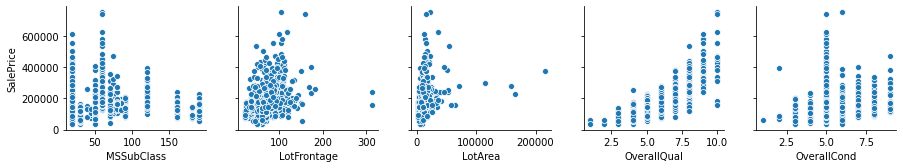

In [104]:
sns.pairplot(x_vars = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond'], y_vars='SalePrice', data=df)

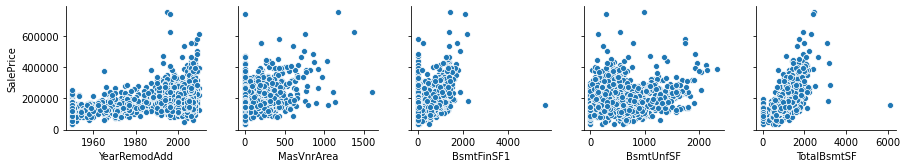

In [105]:
sns.pairplot(x_vars = ['YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice', data=df)

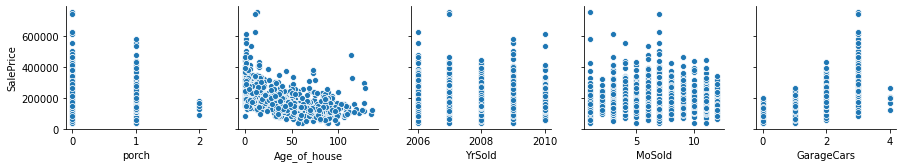

In [106]:
sns.pairplot(x_vars = ['porch','Age_of_house','YrSold','MoSold','GarageCars'], y_vars='SalePrice', data=df)

In [107]:
perc =[.20, .40, .60, .80, 0.90,0.95,0.99] 


In [108]:
df.describe(percentiles=perc)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,porch,Age_of_house
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,0.944521,1.767123,472.980137,94.244521,46.660274,0.142466,6.321918,2007.815753,180921.195890,0.238356,36.547945
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.228992,0.747315,213.804841,125.338794,66.256028,0.349647,2.703626,1.328095,79442.502883,0.437336,30.250152
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000
20%,20.000000,59.000000,7078.400000,5.000000,5.000000,1947.800000,1961.800000,0.000000,0.000000,172.000000,755.800000,848.000000,0.000000,1066.600000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,1.000000,295.600000,0.000000,0.000000,0.000000,4.000000,2006.000000,124000.000000,0.000000,5.000000
40%,30.000000,68.000000,8793.400000,6.000000,5.000000,1965.000000,1980.000000,0.000000,218.600000,374.600000,910.000000,1000.200000,0.000000,1339.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1.000000,2.000000,440.000000,0.000000,0.000000,0.000000,6.000000,2007.000000,147000.000000,0.000000,24.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000,35.000000
60%,60.000000,70.049958,10198.200000,6.000000,5.000000,1984.000000,1998.000000,16.000000,525.600000,604.400000,1088.000000,1182.000000,455.400000,1578.000000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,7.000000,1.000000,1.000000,2.000000,516.000000,100.000000,40.000000,0.000000,7.000000,2008.000000,179280.000000,0.000000,42.400000
80%,80.000000,80.000000,12205.800000,7.000000,7.000000,2003.000000,2005.000000,205.200000,806.400000,896.000000,1391.200000,1482.400000,796.200000,1869.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,1.000000,2.000000,620.200000,192.000000,83.200000,0.000000,8.000000,2009.000000,230000.000000,1.000000,60.200000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,1.000000,3.000000,757.100000,262.000000,130.000000,1.000000,10.000000,2010.000000,278000.000000,1.000000,84.000000


In [109]:
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

<AxesSubplot:xlabel='MSSubClass'>

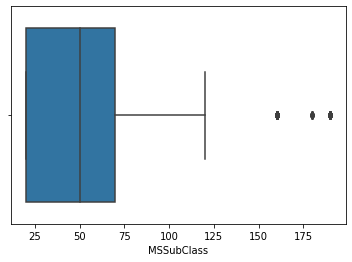

In [110]:
sns.boxplot(df['MSSubClass'])

In [111]:
df.shape

(1460, 59)

<AxesSubplot:xlabel='LotArea'>

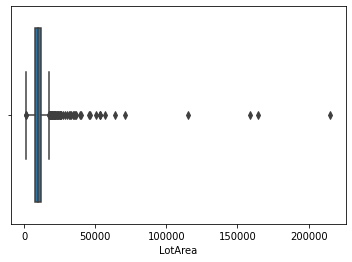

In [112]:
sns.boxplot(df['LotArea'])

In [113]:
df['LotArea'].describe(percentiles = perc)

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
20%        7078.400000
40%        8793.400000
50%        9478.500000
60%       10198.200000
80%       12205.800000
90%       14381.700000
95%       17401.150000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64

In [114]:
df = df[df['LotArea'] <36000]

In [115]:
df.shape

(1444, 59)

<AxesSubplot:xlabel='MSSubClass'>

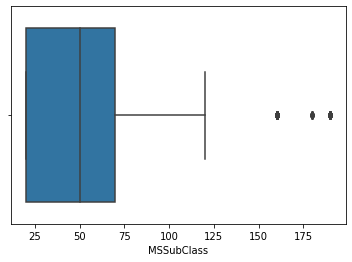

In [116]:
sns.boxplot(df['MSSubClass'])

In [117]:
df['MSSubClass'].describe(percentiles = perc)

count    1444.00000
mean       57.00831
std        42.29943
min        20.00000
20%        20.00000
40%        30.00000
50%        50.00000
60%        60.00000
80%        80.00000
90%       120.00000
95%       160.00000
99%       190.00000
max       190.00000
Name: MSSubClass, dtype: float64

In [118]:
df['MSSubClass'] = df['MSSubClass'].apply(lambda x : df['MSSubClass'].median() if x > 120 else x)

In [119]:
df['MSSubClass'].describe(percentiles = perc)

count    1444.000000
mean       48.497230
std        28.228341
min        20.000000
20%        20.000000
40%        30.000000
50%        50.000000
60%        60.000000
80%        70.000000
90%        85.000000
95%       120.000000
99%       120.000000
max       120.000000
Name: MSSubClass, dtype: float64

In [120]:
df.describe(include='object')

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition
count,1444,1444,1444,1444,1444,1444,1444,1444,1444,1443,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444
unique,5,4,2,5,25,3,5,8,3,5,6,4,4,5,6,5,5,4,2,5,4,6,4,4,3,2
top,RL,Reg,Lvl,Inside,NAmes,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,TA,PConc,TA,No,Unf,Unf,Ex,TA,NA,Attchd,Unf,WD,Normal
freq,1135,925,1310,1045,225,1247,1205,718,1132,514,503,863,897,1267,642,645,951,429,1245,733,729,689,858,599,1253,1184


In [121]:
df['MSZoning'].value_counts()

RL         1135
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

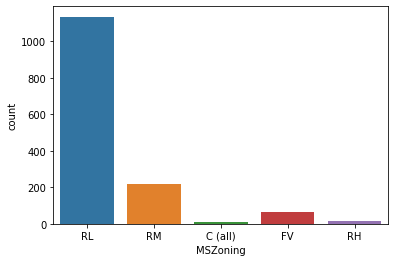

In [122]:
sns.countplot(x="MSZoning",data=df)

Text(0, 0.5, 'Median House Price')

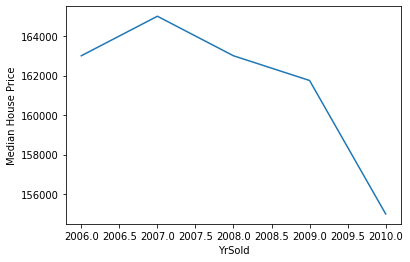

In [123]:
#Change in House price with the years
df.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

Text(0, 0.5, 'Median House Price')

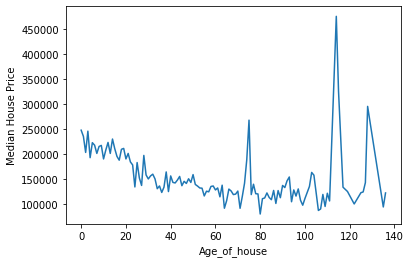

In [124]:
#Change in House price with the years
df.groupby('Age_of_house')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

In [125]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,porch,Age_of_house
MSSubClass,1.000000,-0.187377,-0.186524,0.162718,-0.063996,0.085707,0.094860,0.035172,-0.044988,-0.065613,-0.142860,-0.117910,0.323478,0.195294,0.019280,0.034973,0.191864,0.192803,0.000710,0.208610,0.149712,0.084110,0.012081,0.085561,0.007793,0.046001,0.049765,-0.007278,0.051908,-0.021397,0.066009,-0.000087,-0.086513
LotFrontage,-0.187377,1.000000,0.543857,0.221345,-0.049666,0.114545,0.079845,0.158598,0.135880,0.131422,0.295882,0.366704,0.064939,0.328081,0.065064,-0.004161,0.180984,0.042600,0.251408,-0.003737,0.309621,0.217376,0.099487,0.281043,0.307350,0.081094,0.108974,-0.048081,0.024797,0.006214,0.359736,0.000425,-0.114095
LotArea,-0.186524,0.543857,1.000000,0.184871,-0.028372,0.046726,0.030891,0.139706,0.192080,0.077238,0.309514,0.409363,0.117036,0.403387,0.101926,0.038251,0.188104,0.092127,0.266857,-0.004092,0.353277,0.312552,0.133458,0.282604,0.324813,0.170054,0.133154,-0.035641,-0.017187,-0.039881,0.390017,0.046042,-0.048403
OverallQual,0.162718,0.221345,0.184871,1.000000,-0.090941,0.572558,0.551086,0.401478,0.218921,0.314354,0.539570,0.471026,0.290587,0.591413,0.099391,-0.036986,0.556566,0.268074,0.107118,-0.184523,0.424682,0.398939,0.263272,0.600369,0.556089,0.233508,0.302396,-0.163436,0.069000,-0.026508,0.801249,-0.095808,-0.572834
OverallCond,-0.063996,-0.049666,-0.028372,-0.090941,1.000000,-0.374281,0.071117,-0.126894,-0.040957,-0.138070,-0.176212,-0.146460,0.027589,-0.081042,-0.051870,0.117695,-0.199737,-0.058702,0.007188,-0.087164,-0.058700,-0.025360,0.009464,-0.187452,-0.149469,-0.006875,-0.029158,0.097880,-0.003340,0.043126,-0.080793,0.127782,0.375593
YearBuilt,0.085707,0.114545,0.046726,0.572558,-0.374281,1.000000,0.595143,0.309473,0.249325,0.150774,0.402806,0.285386,0.005360,0.195703,0.186206,-0.036717,0.474276,0.237784,-0.069166,-0.175480,0.091965,0.150483,0.231995,0.539060,0.478218,0.231362,0.184426,-0.456581,0.013070,-0.013380,0.530826,-0.394963,-0.999038
YearRemodAdd,0.094860,0.079845,0.030891,0.551086,0.071117,0.595143,1.000000,0.170899,0.123532,0.181929,0.297223,0.242511,0.133682,0.286278,0.121311,-0.012024,0.441651,0.180618,-0.042419,-0.149849,0.188969,0.110985,0.113838,0.420782,0.371376,0.207785,0.223544,-0.228796,0.023506,0.036895,0.512763,-0.194920,-0.592603
MasVnrArea,0.035172,0.158598,0.139706,0.401478,-0.126894,0.309473,0.170899,1.000000,0.232134,0.115459,0.338954,0.318049,0.161461,0.364805,0.078293,0.016055,0.263336,0.195603,0.094973,-0.037200,0.265803,0.246598,0.120006,0.360192,0.362188,0.155648,0.097838,-0.130029,-0.003550,-0.007872,0.478187,-0.069541,-0.309339
BsmtFinSF1,-0.044988,0.135880,0.192080,0.218921,-0.040957,0.249325,0.123532,0.232134,1.000000,-0.522148,0.458870,0.386184,-0.168133,0.131959,0.654724,0.073937,0.047506,-0.012984,-0.111817,-0.081728,0.006385,0.234249,0.109910,0.222119,0.266227,0.182186,0.068379,-0.146837,-0.007666,0.016920,0.396654,-0.058239,-0.248197
BsmtUnfSF,-0.065613,0.131422,0.077238,0.314354,-0.138070,0.150774,0.181929,0.115459,-0.522148,1.000000,0.450109,0.341069,0.001808,0.253918,-0.420462,-0.100939,0.289088,-0.040919,0.164867,0.029397,0.255392,0.060941,0.033983,0.219246,0.190682,0.004880,0.128113,0.001434,0.033357,-0.037481,0.227724,-0.011557,-0.152185


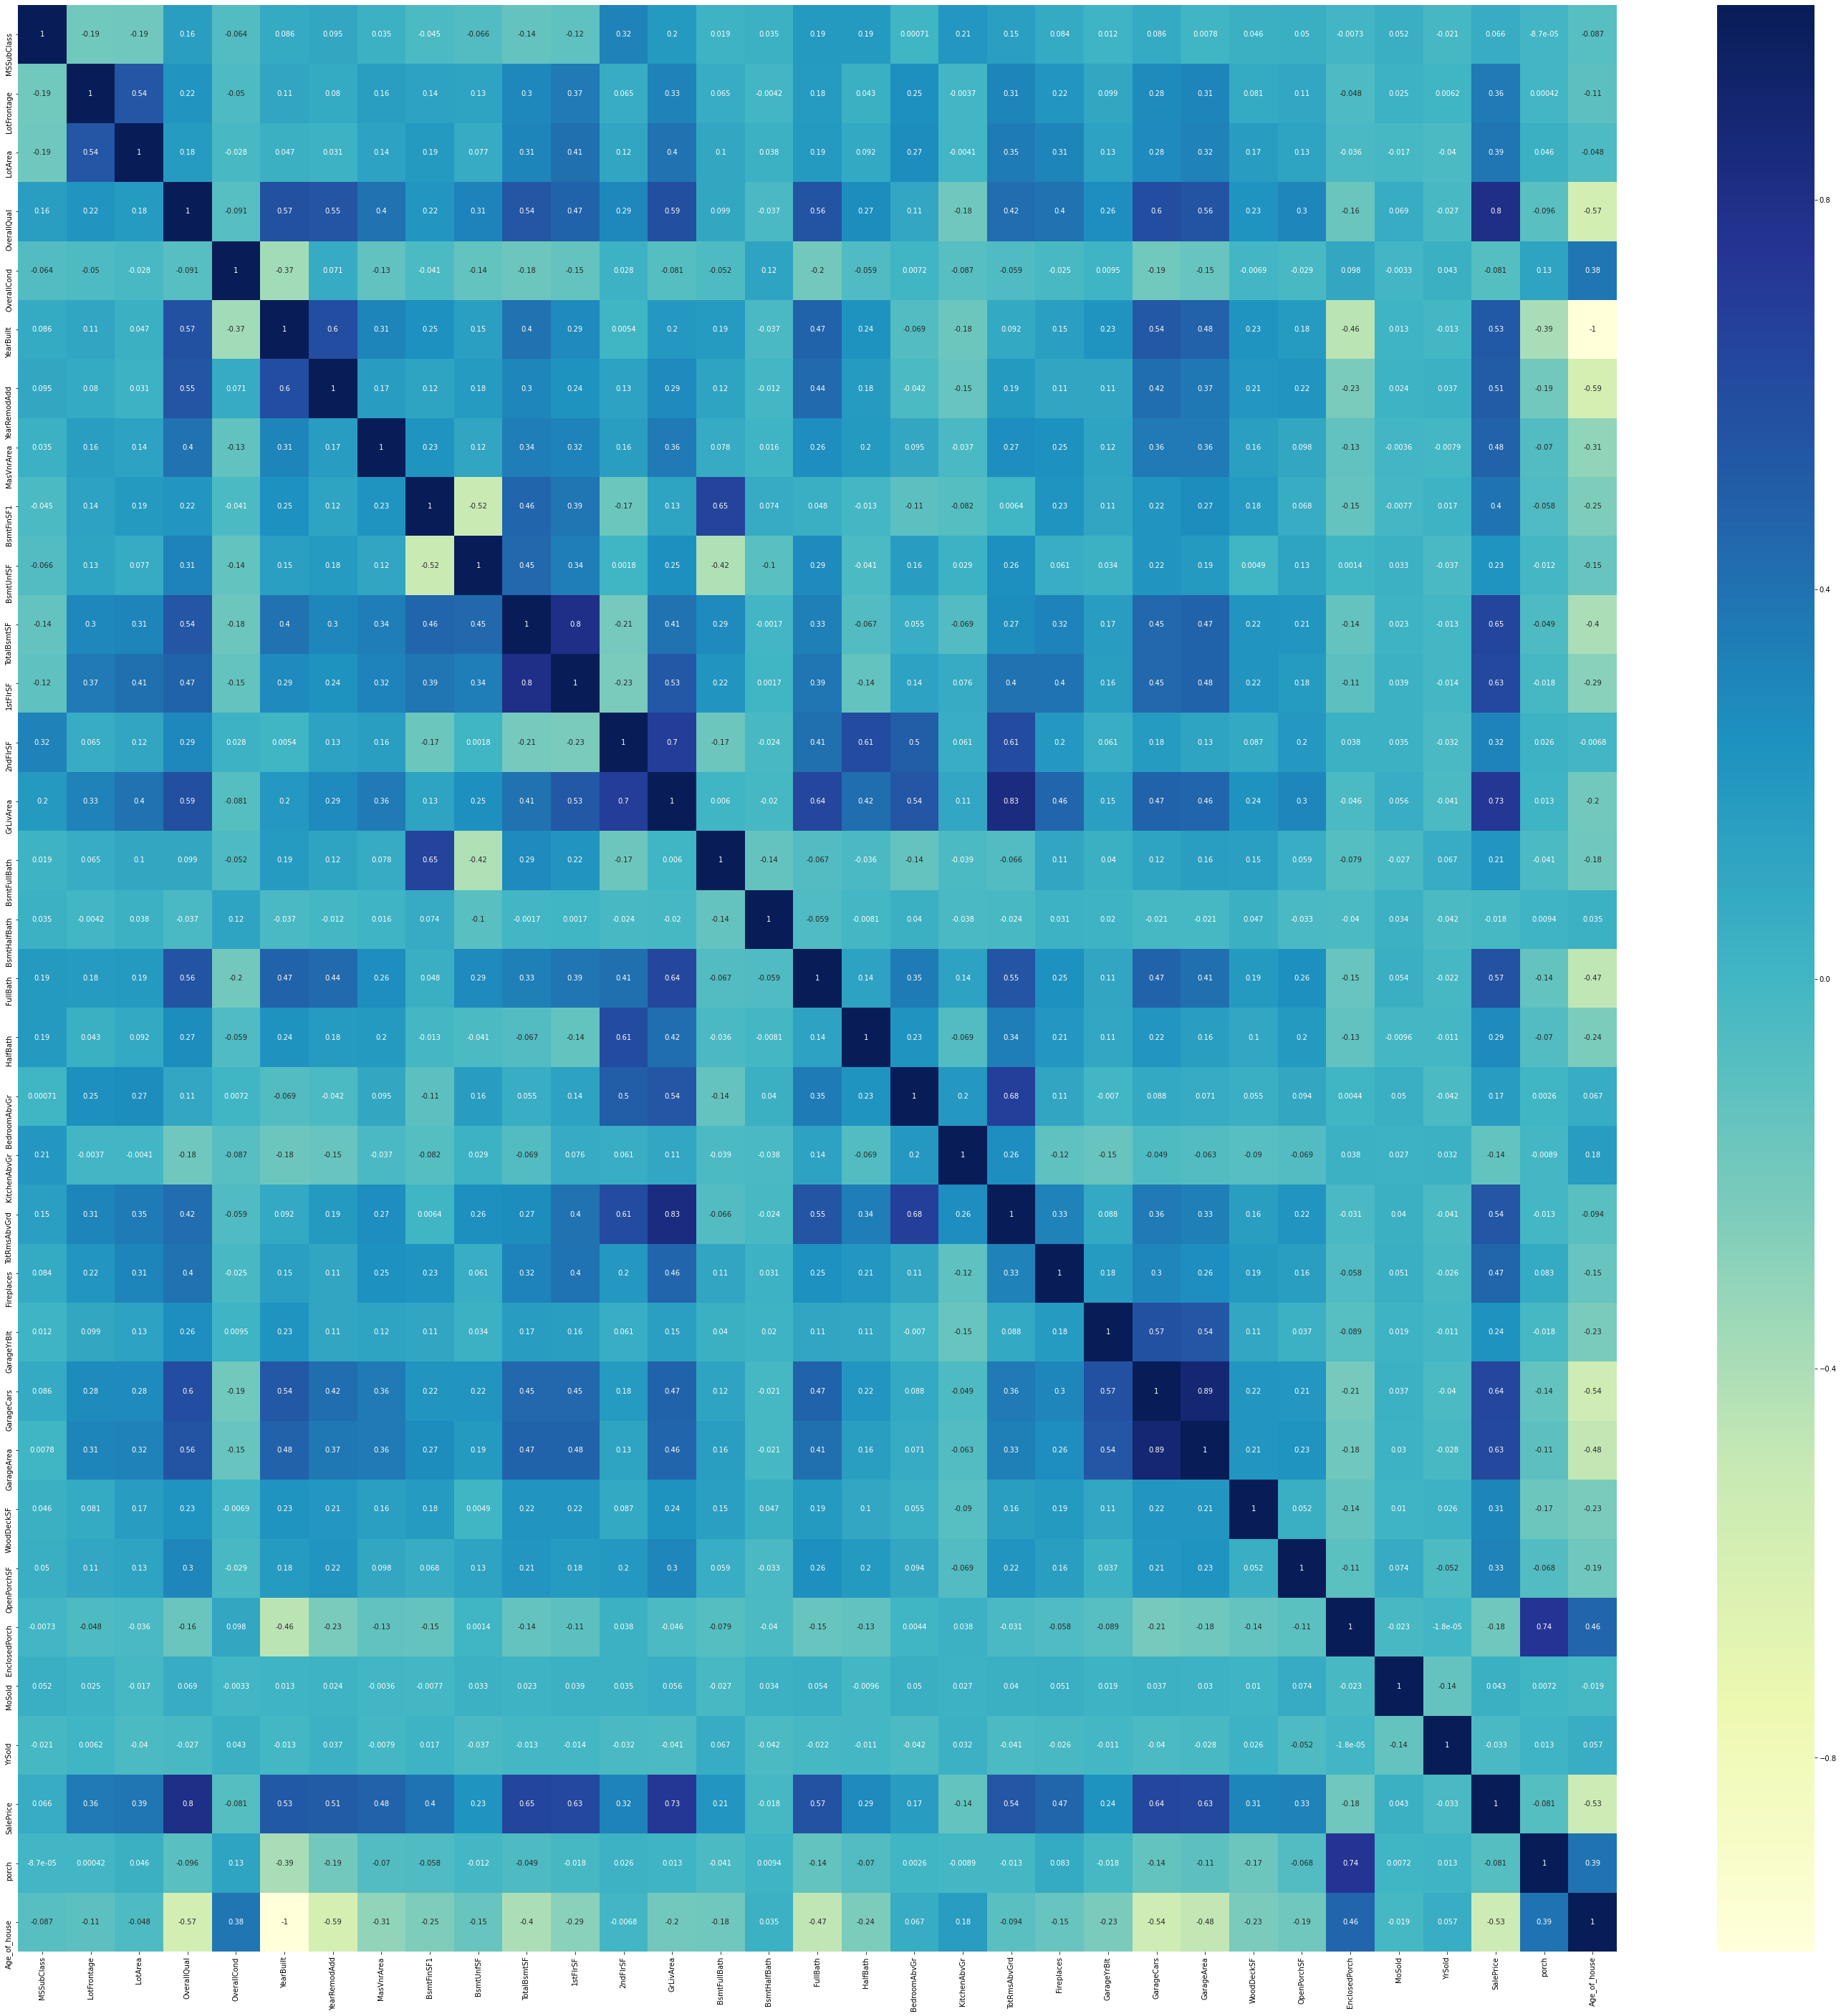

In [126]:
# plotting correlations on a heatmap
df.corr()

# figure size
plt.figure(figsize=(50,50))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()


In [127]:
#we see that garage cars is highly correlated with garage area , i.e 0.88
#so we can drop one of the column 
df.drop('GarageArea',inplace = True,axis = 1)

In [128]:
#the correlation between TotRmsAbvGrd and GrLivArea is 0.82
#so lets drop one of the column
df.drop('TotRmsAbvGrd',axis = 1, inplace= True)


In [129]:
#the correlation between 1stFlrSF and TotalBsmtSF is 82%

df.drop('1stFlrSF',axis = 1, inplace= True)

In [130]:
#the correlation between 2ndFlrSF and GrLivArea is 70%

df.drop('2ndFlrSF',axis = 1, inplace= True)

In [131]:
#we see that age of house and year built are highly correlated 
#lets drop one 
df.drop('YearBuilt',inplace=True,axis= 1)

In [132]:
# we observe that there are a lot of outliers because of the saleprice column, but since it is a target variable
#we dont want to treat it, as in real life scenarios we cant do it, so lets transform it

<AxesSubplot:xlabel='SalePrice'>

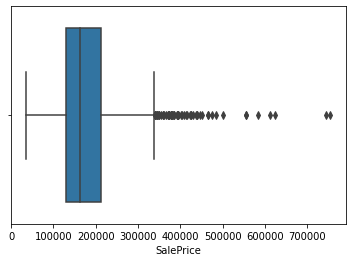

In [133]:
sns.boxplot(df['SalePrice'])

In [134]:
df['SalePrice'] = np.log(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice'>

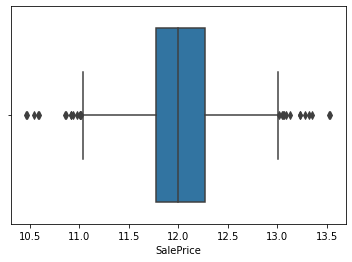

In [135]:
sns.boxplot(df['SalePrice'])

<AxesSubplot:xlabel='FullBath', ylabel='count'>

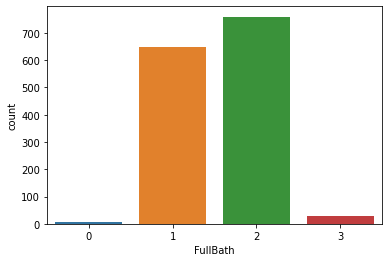

In [136]:
sns.countplot(x="FullBath",data=df)
#we observe that majority homes have 1-2 full bath 

<AxesSubplot:xlabel='HalfBath', ylabel='count'>

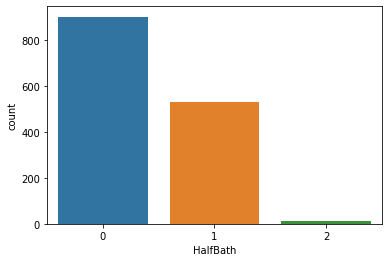

In [137]:
sns.countplot(x="HalfBath",data=df)
#we observe that majority homes have 0-1 half bath 

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

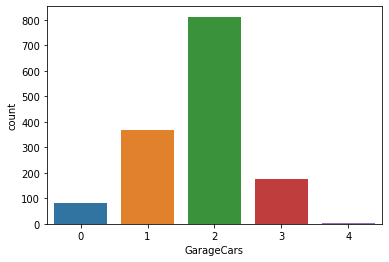

In [138]:
sns.countplot(x="GarageCars",data=df)
#maximum homes have 2 cars keeping garage

## Data Preparation

In [139]:
#lets see the shape of the dataframe
df.shape

(1444, 54)

In [140]:
#creating the target variable
y = df['SalePrice']

In [141]:
#creating the independent variable 
X = df.loc[ : , df.columns != 'SalePrice'] 

In [142]:
X.shape

(1444, 53)

In [143]:
y.shape

(1444,)

### Handling the categorical variables 

In [144]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Unf,Ex,Gd,NA,Attchd,RFn,WD,Normal
1,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Unf,Ex,TA,TA,Attchd,RFn,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Unf,Ex,Gd,TA,Attchd,RFn,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Other,None,TA,TA,BrkTil,TA,No,ALQ,Unf,Gd,Gd,Gd,Detchd,Unf,WD,Others
4,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Unf,Ex,Gd,TA,Attchd,RFn,WD,Normal


In [145]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Others,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_Others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Others,BsmtFinType1_Unf,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Others
0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1
4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [146]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [147]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [148]:
X.shape

(1444, 135)

## split into train and test

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size = 0.3, random_state=100)

In [150]:
print('shape of X_train: ', X_train.shape)
print('shape of y_train: ', y_train.shape)

shape of X_train:  (1010, 135)
shape of y_train:  (1010,)


In [151]:
print('shape of X_test: ', X_test.shape)
print('shape of y_test: ', y_test.shape)

shape of X_test:  (434, 135)
shape of y_test:  (434,)


## scaling the features 

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_train_scaled.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,porch,Age_of_house,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Others,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_Others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Others,BsmtFinType1_Unf,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Detchd,GarageType_NA,GarageType_Others,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Others
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.0,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,0.284851,0.312499,0.301907,0.562486,0.511740,0.572739,0.061563,0.195546,0.263604,0.323832,0.280017,0.138944,0.052475,0.518812,0.187129,0.473762,0.043564,0.193729,0.946535,0.436634,0.124822,0.082251,0.149505,0.484068,0.455941,0.118812,0.271076,0.040594,0.00

In [153]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

# Model Building and Evaluation 

In [154]:
names = ['r2_train','r2_test','rss1','rss2','mse_train','mse_test']
metric = pd.DataFrame(names, columns =['Metrics'])

In [155]:
def get_metrics(y_pred_train,y_pred_test,X_train=X_train_scaled,X_test=X_test_scaled,y_train=y_train,y_test = y_test):
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print('r2_train_lr:', r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print('r2_test_lr:',r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print('rss1_lr:',rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print('rss2_lr:',rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print('mse_train_lr:',mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print('mse_test_lr:',mse_test_lr)
    metric.append(mse_test_lr**0.5)
    
    return metric 

## LINEAR REGRESSION

In [156]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [157]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-2536789180726.8433
[ 4.16521203e-02  4.75171948e-02  1.77180078e-01  4.38560527e-01
  3.75883794e-01  1.97933077e-03  9.92730202e-02  7.90602233e-04
 -1.41460796e-01  5.15365728e-01  9.70780371e-01  8.91451697e-02
  3.45812359e-02  6.44455158e-02  6.47020812e-02  5.93801827e-02
 -1.00667473e-01  5.79860124e-02  2.53678918e+12  1.85283704e-01
  6.32944438e-02  8.05604560e-02  1.17229985e-03  1.71376071e-02
  1.58157446e-03  5.82934718e-02 -3.12383203e-01  2.16627099e-01
  1.03761668e-01  1.34108438e-01  9.23485814e-02  1.17561570e-02
 -1.02857941e-02 -2.31933594e-03 -2.21252441e-02  2.17590332e-02
 -2.85816193e-03 -1.12075806e-02 -8.75854492e-03 -7.03125000e-02
 -2.84423828e-02 -1.12152100e-02 -6.49147034e-02 -6.21032715e-03
  8.99276733e-02 -7.26318359e-02 -4.15344238e-02 -6.54602051e-02
 -1.17095947e-01 -6.40869141e-02 -3.79791260e-02  5.79833984e-03
 -8.85009766e-02 -2.24685669e-02  4.71305847e-02 -6.26220703e-02
 -6.57501221e-02 -5.88989258e-02 -4.46319580e-02 -2.32391357e-02
  1.1

In [158]:
y_pred_train = lm.predict(X_train_scaled)
y_pred_test = lm.predict(X_test_scaled)

metrics_lr = get_metrics(y_pred_train,y_pred_test)
metric['lr'] = metrics_lr

r2_train_lr: 0.9360887420936502
r2_test_lr: -554973.8618829248
rss1_lr: 10.12789752423908
rss2_lr: 38248631.31935676
mse_train_lr: 0.010027621311127801
mse_test_lr: 88130.48691096029


In [159]:
# A Negative R2 means you are doing worse than the mean value. 

## RFE

In [160]:
# Running RFE with the output number of the variable equal to 40
#as we have decided to keep 20-30 or less columns in our final model lets start with 40
#and then determine which are important

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

rfe = RFE(lm, 40)             
rfe = rfe.fit(X_train_scaled, y_train)

In [161]:
list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 2),
 ('LotFrontage', False, 21),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', False, 53),
 ('MasVnrArea', False, 4),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 67),
 ('FullBath', False, 6),
 ('HalfBath', False, 7),
 ('BedroomAbvGr', False, 33),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 9),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 79),
 ('MoSold', False, 63),
 ('YrSold', False, 85),
 ('porch', True, 1),
 ('Age_of_house', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 51),
 ('LotShape_IR3', False, 26),
 ('LotShape_Reg', False, 91),
 ('LandContour_Others', False, 50),
 ('LotConfig_CulDSac', False, 27),
 ('LotConfi

In [162]:
#the choosen columns
col = X_train_scaled.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'porch',
       'Age_of_house', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition1_Others', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Unf', 'Foundation_PConc', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_NA', 'BsmtExposure_NA', 'HeatingQC_Fa',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'SaleType_Others',
       'SaleType_WD', 'SaleCondition_Others'],
      dtype='object')

In [163]:
X_train_rfe = X_train_scaled[col]

X_test_rfe = X_test_scaled[col]

In [164]:
#calculating the vif

def check_vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF',ascending=False)
    print(vif)

In [165]:
check_vif(X_train_rfe)

                Features    VIF
17           MSZoning_RL  73.78
5            TotalBsmtSF  72.03
1            OverallQual  51.94
31           BsmtQual_NA  29.60
32       BsmtExposure_NA  29.30
4              BsmtUnfSF  27.10
38           SaleType_WD  23.68
3             BsmtFinSF1  19.34
18           MSZoning_RM  16.28
2            OverallCond  16.13
6              GrLivArea  15.91
10            GarageCars  12.65
36        KitchenQual_TA  12.14
0                LotArea  10.47
14          Age_of_house  10.21
35        KitchenQual_Gd   8.20
15           MSZoning_FV   4.87
28      Foundation_PConc   4.08
7           BsmtFullBath   3.32
9             Fireplaces   2.86
39  SaleCondition_Others   2.27
37       SaleType_Others   2.06
11            WoodDeckSF   1.90
34        KitchenQual_Fa   1.88
12           OpenPorchSF   1.87
26       BldgType_TwnhsE   1.79
13                 porch   1.77
16           MSZoning_RH   1.69
22  Neighborhood_NridgHt   1.57
25        BldgType_Twnhs   1.50
8       

In [166]:
# lets the remove the high vif columns as they are already explained by the other columns and
#it will cause problem in interpretability becuase of the multicollinarity 

In [167]:
X_train_rfe.drop('TotalBsmtSF',inplace = True,axis = 1)
check_vif(X_train_rfe)

                Features    VIF
16           MSZoning_RL  72.65
1            OverallQual  51.92
30           BsmtQual_NA  29.58
31       BsmtExposure_NA  29.29
37           SaleType_WD  23.65
17           MSZoning_RM  16.14
2            OverallCond  16.09
5              GrLivArea  15.89
9             GarageCars  12.65
35        KitchenQual_TA  12.11
0                LotArea  10.34
13          Age_of_house  10.20
34        KitchenQual_Gd   8.20
4              BsmtUnfSF   6.57
3             BsmtFinSF1   6.02
14           MSZoning_FV   4.84
27      Foundation_PConc   4.03
6           BsmtFullBath   3.19
8             Fireplaces   2.86
38  SaleCondition_Others   2.27
36       SaleType_Others   2.05
10            WoodDeckSF   1.90
33        KitchenQual_Fa   1.88
11           OpenPorchSF   1.87
25       BldgType_TwnhsE   1.78
12                 porch   1.76
15           MSZoning_RH   1.69
21  Neighborhood_NridgHt   1.57
24        BldgType_Twnhs   1.50
7           KitchenAbvGr   1.41
20  Neig

In [168]:
X_train_rfe.drop('MSZoning_RL',inplace = True,axis = 1)
check_vif(X_train_rfe)

                Features    VIF
1            OverallQual  43.10
29           BsmtQual_NA  29.53
30       BsmtExposure_NA  29.29
36           SaleType_WD  21.39
5              GrLivArea  15.86
2            OverallCond  14.43
9             GarageCars  12.54
0                LotArea  10.09
13          Age_of_house  10.01
34        KitchenQual_TA   9.04
33        KitchenQual_Gd   6.80
4              BsmtUnfSF   6.38
3             BsmtFinSF1   5.91
26      Foundation_PConc   3.99
6           BsmtFullBath   3.18
8             Fireplaces   2.86
37  SaleCondition_Others   2.15
16           MSZoning_RM   2.02
35       SaleType_Others   2.02
10            WoodDeckSF   1.90
11           OpenPorchSF   1.87
24       BldgType_TwnhsE   1.76
12                 porch   1.75
32        KitchenQual_Fa   1.64
20  Neighborhood_NridgHt   1.56
23        BldgType_Twnhs   1.49
14           MSZoning_FV   1.41
7           KitchenAbvGr   1.41
19  Neighborhood_MeadowV   1.27
17  Neighborhood_BrkSide   1.23
18  Neig

In [169]:
X_train_rfe.drop('OverallQual',inplace = True,axis = 1)
check_vif(X_train_rfe)

                Features    VIF
28           BsmtQual_NA  29.53
29       BsmtExposure_NA  29.28
35           SaleType_WD  20.31
4              GrLivArea  13.53
1            OverallCond  12.46
8             GarageCars  11.68
0                LotArea  10.08
12          Age_of_house   9.70
33        KitchenQual_TA   8.99
32        KitchenQual_Gd   6.76
3              BsmtUnfSF   5.76
2             BsmtFinSF1   5.67
25      Foundation_PConc   3.81
5           BsmtFullBath   3.17
7             Fireplaces   2.83
36  SaleCondition_Others   2.08
15           MSZoning_RM   2.01
34       SaleType_Others   1.97
9             WoodDeckSF   1.90
10           OpenPorchSF   1.87
11                 porch   1.75
23       BldgType_TwnhsE   1.74
31        KitchenQual_Fa   1.64
19  Neighborhood_NridgHt   1.50
22        BldgType_Twnhs   1.49
6           KitchenAbvGr   1.39
13           MSZoning_FV   1.38
18  Neighborhood_MeadowV   1.26
16  Neighborhood_BrkSide   1.23
17  Neighborhood_Crawfor   1.22
30      

In [170]:
X_train_rfe.drop('SaleType_WD',inplace = True,axis = 1)
check_vif(X_train_rfe)

                Features    VIF
28           BsmtQual_NA  29.53
29       BsmtExposure_NA  29.27
4              GrLivArea  13.31
1            OverallCond  11.81
8             GarageCars  11.60
0                LotArea   9.96
12          Age_of_house   9.01
33        KitchenQual_TA   7.19
32        KitchenQual_Gd   5.91
3              BsmtUnfSF   5.69
2             BsmtFinSF1   5.54
25      Foundation_PConc   3.77
5           BsmtFullBath   3.15
7             Fireplaces   2.82
15           MSZoning_RM   2.00
9             WoodDeckSF   1.89
10           OpenPorchSF   1.86
11                 porch   1.75
23       BldgType_TwnhsE   1.67
31        KitchenQual_Fa   1.53
19  Neighborhood_NridgHt   1.46
35  SaleCondition_Others   1.44
22        BldgType_Twnhs   1.43
6           KitchenAbvGr   1.39
13           MSZoning_FV   1.37
18  Neighborhood_MeadowV   1.26
16  Neighborhood_BrkSide   1.23
17  Neighborhood_Crawfor   1.22
30          HeatingQC_Fa   1.17
20  Neighborhood_StoneBr   1.16
21     C

In [171]:
X_train_rfe.drop('GrLivArea',inplace = True,axis = 1)
check_vif(X_train_rfe)

                Features    VIF
27           BsmtQual_NA  29.53
28       BsmtExposure_NA  29.26
1            OverallCond  11.80
7             GarageCars  10.84
0                LotArea   9.31
11          Age_of_house   8.66
32        KitchenQual_TA   7.13
31        KitchenQual_Gd   5.91
3              BsmtUnfSF   5.52
2             BsmtFinSF1   5.38
24      Foundation_PConc   3.65
4           BsmtFullBath   3.11
6             Fireplaces   2.51
14           MSZoning_RM   2.00
8             WoodDeckSF   1.84
9            OpenPorchSF   1.78
10                 porch   1.75
22       BldgType_TwnhsE   1.66
30        KitchenQual_Fa   1.52
18  Neighborhood_NridgHt   1.46
34  SaleCondition_Others   1.44
21        BldgType_Twnhs   1.41
12           MSZoning_FV   1.37
5           KitchenAbvGr   1.34
17  Neighborhood_MeadowV   1.26
15  Neighborhood_BrkSide   1.23
16  Neighborhood_Crawfor   1.22
29          HeatingQC_Fa   1.17
19  Neighborhood_StoneBr   1.16
20     Condition1_Others   1.15
33      

In [172]:
X_train_rfe.drop('OverallCond',inplace = True,axis = 1)
check_vif(X_train_rfe)

                Features    VIF
26           BsmtQual_NA  29.53
27       BsmtExposure_NA  29.26
6             GarageCars  10.56
0                LotArea   9.20
10          Age_of_house   7.17
31        KitchenQual_TA   6.61
2              BsmtUnfSF   5.49
1             BsmtFinSF1   5.28
30        KitchenQual_Gd   5.18
23      Foundation_PConc   3.65
3           BsmtFullBath   3.11
5             Fireplaces   2.51
13           MSZoning_RM   2.00
7             WoodDeckSF   1.83
8            OpenPorchSF   1.77
9                  porch   1.74
21       BldgType_TwnhsE   1.66
29        KitchenQual_Fa   1.52
17  Neighborhood_NridgHt   1.46
33  SaleCondition_Others   1.44
20        BldgType_Twnhs   1.40
11           MSZoning_FV   1.36
4           KitchenAbvGr   1.32
16  Neighborhood_MeadowV   1.26
14  Neighborhood_BrkSide   1.23
15  Neighborhood_Crawfor   1.21
18  Neighborhood_StoneBr   1.16
19     Condition1_Others   1.15
28          HeatingQC_Fa   1.15
32       SaleType_Others   1.13
24      

In [173]:
X_train_rfe.drop('GarageCars',inplace = True,axis = 1)
check_vif(X_train_rfe)

                Features    VIF
25           BsmtQual_NA  29.47
26       BsmtExposure_NA  29.26
0                LotArea   8.50
9           Age_of_house   7.08
30        KitchenQual_TA   6.29
2              BsmtUnfSF   5.06
1             BsmtFinSF1   4.92
29        KitchenQual_Gd   4.77
22      Foundation_PConc   3.52
3           BsmtFullBath   3.11
5             Fireplaces   2.47
12           MSZoning_RM   1.97
6             WoodDeckSF   1.82
7            OpenPorchSF   1.76
8                  porch   1.74
20       BldgType_TwnhsE   1.65
28        KitchenQual_Fa   1.52
16  Neighborhood_NridgHt   1.44
32  SaleCondition_Others   1.44
19        BldgType_Twnhs   1.39
10           MSZoning_FV   1.35
4           KitchenAbvGr   1.32
15  Neighborhood_MeadowV   1.25
13  Neighborhood_BrkSide   1.23
14  Neighborhood_Crawfor   1.21
18     Condition1_Others   1.15
17  Neighborhood_StoneBr   1.15
27          HeatingQC_Fa   1.15
31       SaleType_Others   1.13
23      Foundation_Stone   1.08
21     H

In [174]:
X_train_rfe.drop('LotArea',inplace = True,axis = 1)
check_vif(X_train_rfe)

                Features    VIF
24           BsmtQual_NA  29.46
25       BsmtExposure_NA  29.21
8           Age_of_house   6.85
29        KitchenQual_TA   5.82
0             BsmtFinSF1   4.57
1              BsmtUnfSF   4.57
28        KitchenQual_Gd   4.56
21      Foundation_PConc   3.46
2           BsmtFullBath   3.10
4             Fireplaces   2.37
11           MSZoning_RM   1.89
5             WoodDeckSF   1.80
6            OpenPorchSF   1.74
7                  porch   1.74
19       BldgType_TwnhsE   1.51
27        KitchenQual_Fa   1.50
15  Neighborhood_NridgHt   1.44
31  SaleCondition_Others   1.43
9            MSZoning_FV   1.35
18        BldgType_Twnhs   1.32
3           KitchenAbvGr   1.31
14  Neighborhood_MeadowV   1.25
13  Neighborhood_Crawfor   1.21
12  Neighborhood_BrkSide   1.21
26          HeatingQC_Fa   1.15
16  Neighborhood_StoneBr   1.15
17     Condition1_Others   1.14
30       SaleType_Others   1.13
22      Foundation_Stone   1.08
20     HouseStyle_2.5Unf   1.06
10      

In [175]:
X_train_rfe.drop('Age_of_house',inplace = True,axis = 1)
check_vif(X_train_rfe)

                Features    VIF
23           BsmtQual_NA  29.45
24       BsmtExposure_NA  29.20
0             BsmtFinSF1   4.57
1              BsmtUnfSF   4.53
27        KitchenQual_Gd   3.87
28        KitchenQual_TA   3.70
2           BsmtFullBath   3.10
20      Foundation_PConc   2.98
4             Fireplaces   2.37
5             WoodDeckSF   1.78
6            OpenPorchSF   1.74
10           MSZoning_RM   1.67
7                  porch   1.50
18       BldgType_TwnhsE   1.45
14  Neighborhood_NridgHt   1.44
30  SaleCondition_Others   1.42
8            MSZoning_FV   1.35
3           KitchenAbvGr   1.31
17        BldgType_Twnhs   1.29
26        KitchenQual_Fa   1.28
13  Neighborhood_MeadowV   1.25
11  Neighborhood_BrkSide   1.17
15  Neighborhood_StoneBr   1.15
12  Neighborhood_Crawfor   1.14
25          HeatingQC_Fa   1.14
16     Condition1_Others   1.13
29       SaleType_Others   1.13
19     HouseStyle_2.5Unf   1.06
21      Foundation_Stone   1.06
9            MSZoning_RH   1.05
22      

In [176]:
#whatever we have dropped in X_train, we need to drop those in X_test also. 

In [177]:
X_test_rfe = X_test_rfe[X_train_rfe.columns]

In [178]:
# Instantiate
lm_RFE = LinearRegression()

# Fit a line
lm_RFE.fit(X_train_rfe, y_train)

LinearRegression()

In [179]:
# Print the coefficients and intercept
print(lm_RFE.intercept_)
print(lm_RFE.coef_)

11.825984537682224
[ 0.63586818  0.40585891 -0.01656286 -0.00389878  0.41260533  0.21687193
  0.42523085  0.02557899  0.12589991 -0.02311481 -0.09574609 -0.0349777
  0.18696172 -0.11702215  0.15506009  0.20703966 -0.0113235  -0.08518439
 -0.12787984  0.08953114  0.17158241  0.08613998  0.31035481  0.09853803
 -0.0914097  -0.13893894 -0.51063683 -0.16934557 -0.32540403  0.01059637
 -0.04434374]


In [180]:
y_pred_train = lm_RFE.predict(X_train_rfe)
y_pred_test = lm_RFE.predict(X_test_rfe)

metrics_lr_RFE = get_metrics(y_pred_train,y_pred_test)
metric['lr_RFE'] = metrics_lr_RFE

r2_train_lr: 0.7667415930849761
r2_test_lr: 0.690801126422907
rss1_lr: 36.96402354283669
rss2_lr: 21.30985479177521
mse_train_lr: 0.0365980431117195
mse_test_lr: 0.04910104790731615


## Ridge Regression

In [181]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 50, 100,200,500 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 50, 100,
                                   200, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [182]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [183]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']

ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 5.67940734e-01  3.51300390e-01  5.30851593e-03  4.28909802e-04
  4.13601879e-01  2.07689663e-01  3.83283426e-01  2.48948134e-02
  1.15498138e-01 -2.59581755e-02 -1.03495391e-01 -4.07762608e-02
  1.72195633e-01 -1.09582778e-01  1.66877450e-01  1.92270667e-01
 -1.16696248e-02 -8.80707564e-02 -1.23942881e-01  6.95126843e-02
  1.76947439e-01  5.74470251e-02  1.85183610e-01  3.16447323e-03
 -2.93325649e-02 -1.37315073e-01 -4.61220876e-01 -1.48706138e-01
 -3.06637547e-01  6.13158458e-03 -3.66111010e-02]


In [184]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metrics_ridge = get_metrics(y_pred_train,y_pred_test)
metric['ridge'] = metrics_ridge

r2_train_lr: 0.7649834738638814
r2_test_lr: 0.6905237314318258
rss1_lr: 37.24262940806209
rss2_lr: 21.328972736519063
mse_train_lr: 0.036873890503031775
mse_test_lr: 0.04914509847124208


## Lasso Regression

In [185]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 50, 100,
                                   200, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [186]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [187]:
#Fitting Lasso model for alpha = 0.001 

alpha = model_cv.best_params_['alpha']

#for subjective answers -- double the alpha
#alpha = model_cv.best_params_['alpha']*2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.001)

In [188]:
lasso.coef_

array([ 0.60445351,  0.36924052, -0.        , -0.        ,  0.41732191,
        0.18131482,  0.38025406,  0.01227842,  0.07731994, -0.        ,
       -0.10875097, -0.0138323 ,  0.15363427, -0.06465966,  0.14277194,
        0.14048114, -0.        , -0.0555009 , -0.10284694,  0.        ,
        0.17328701,  0.        ,  0.        , -0.        , -0.        ,
       -0.11875162, -0.44733176, -0.12864926, -0.29337927, -0.        ,
       -0.02204252])

In [189]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metrics_lasso = get_metrics(y_pred_train,y_pred_test)
metric['lasso'] = metrics_lasso


r2_train_lr: 0.7602629058976961
r2_test_lr: 0.6904668283896114
rss1_lr: 37.99068898604422
rss2_lr: 21.332894469974203
mse_train_lr: 0.03761454355053883
mse_test_lr: 0.04915413472344286


## Plotting the graphs

Text(0, 0.5, 'y__test_pred')

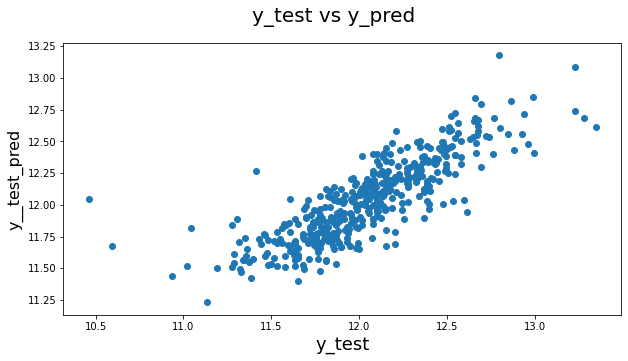

In [190]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y__test_pred', fontsize=16)                          # Y-label

# we observe that the error terms are independent and have constant variance

Text(0.5, 0, 'Errors')

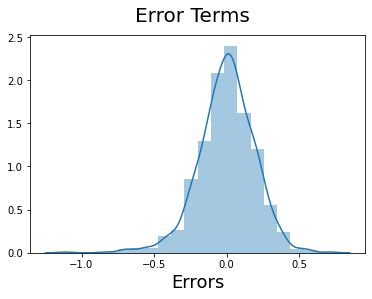

In [191]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

#we observe that the error terms are normally distributed with mean at 0

Text(0, 0.5, 'residuals')

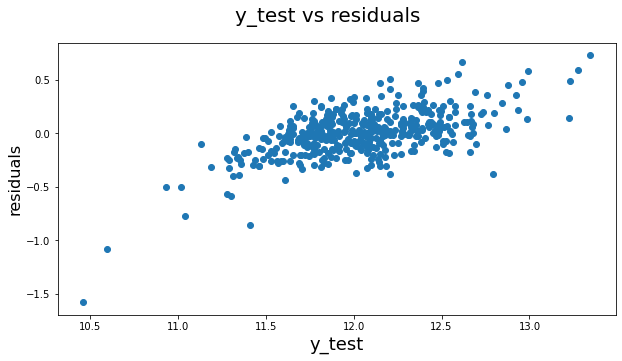

In [192]:
# Plotting y_test and residuals to understand the spread.
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,(y_test - y_pred_test))
fig.suptitle('y_test vs residuals', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('residuals', fontsize=16)                          # Y-label

# we observe that the error terms are independent and have constant variance

In [193]:
#print all the metrics for all the models together for ease in interpretation
metric

,Metrics,lr,lr_RFE,ridge,lasso
0,r2_train,9.360887e-01,0.766742,0.764983,0.760263
1,r2_test,-5.549739e+05,0.690801,0.690524,0.690467
2,rss1,1.012790e+01,36.964024,37.242629,37.990689
3,rss2,3.824863e+07,21.309855,21.328973,21.332894
4,mse_train,1.001380e-01,0.191306,0.192026,0.193945
5,mse_test,2.968678e+02,0.221588,0.221687,0.221707


In [194]:
coeff_values = pd.DataFrame(X_train_rfe.columns, columns = ['Feature Name'])

coeff_values['LR_RFE'] = lm_RFE.coef_
coeff_values['Lasso'] = lasso.coef_
coeff_values['Ridge'] = ridge.coef_

coeff_values

,Feature Name,LR_RFE,Lasso,Ridge
0,BsmtFinSF1,0.635868,0.604454,0.567941
1,BsmtUnfSF,0.405859,0.369241,0.351300
2,BsmtFullBath,-0.016563,-0.000000,0.005309
3,KitchenAbvGr,-0.003899,-0.000000,0.000429
4,Fireplaces,0.412605,0.417322,0.413602
5,WoodDeckSF,0.216872,0.181315,0.207690
6,OpenPorchSF,0.425231,0.380254,0.383283
7,porch,0.025579,0.012278,0.024895
8,MSZoning_FV,0.125900,0.077320,0.115498
9,MSZoning_RH,-0.023115,-0.000000,-0.025958


In [195]:
lasso_sort = coeff_values[['Feature Name','Lasso']]

lasso_sort['sign'] = lasso_sort['Lasso'].apply(lambda x : 'positive' if x >= 0 else 'negative')
lasso_sort['coef'] = lasso_sort['Lasso'].apply(lambda x: abs(x) )
lasso_sort = lasso_sort.sort_values(by=['coef'], ascending=False)
lasso_sort

,Feature Name,Lasso,sign,coef
0,BsmtFinSF1,0.604454,positive,0.604454
26,KitchenQual_Fa,-0.447332,negative,0.447332
4,Fireplaces,0.417322,positive,0.417322
6,OpenPorchSF,0.380254,positive,0.380254
1,BsmtUnfSF,0.369241,positive,0.369241
28,KitchenQual_TA,-0.293379,negative,0.293379
5,WoodDeckSF,0.181315,positive,0.181315
20,Foundation_PConc,0.173287,positive,0.173287
12,Neighborhood_Crawfor,0.153634,positive,0.153634
14,Neighborhood_NridgHt,0.142772,positive,0.142772


<BarContainer object of 31 artists>

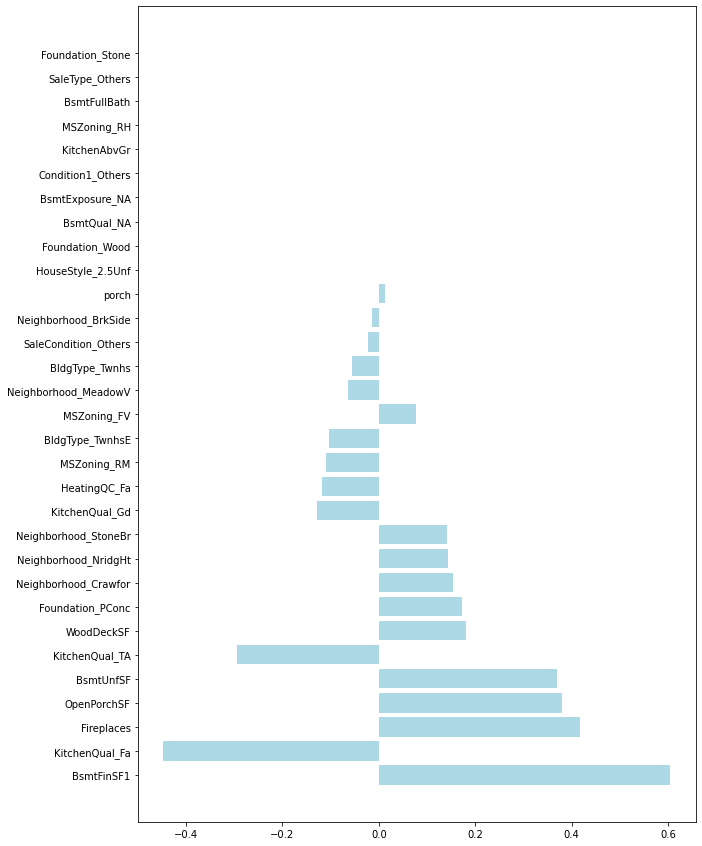

In [196]:
fig = plt.figure(figsize=(10,15))
plt.barh(lasso_sort['Feature Name'],lasso_sort['Lasso'], color ='#ADD8E6')

<BarContainer object of 31 artists>

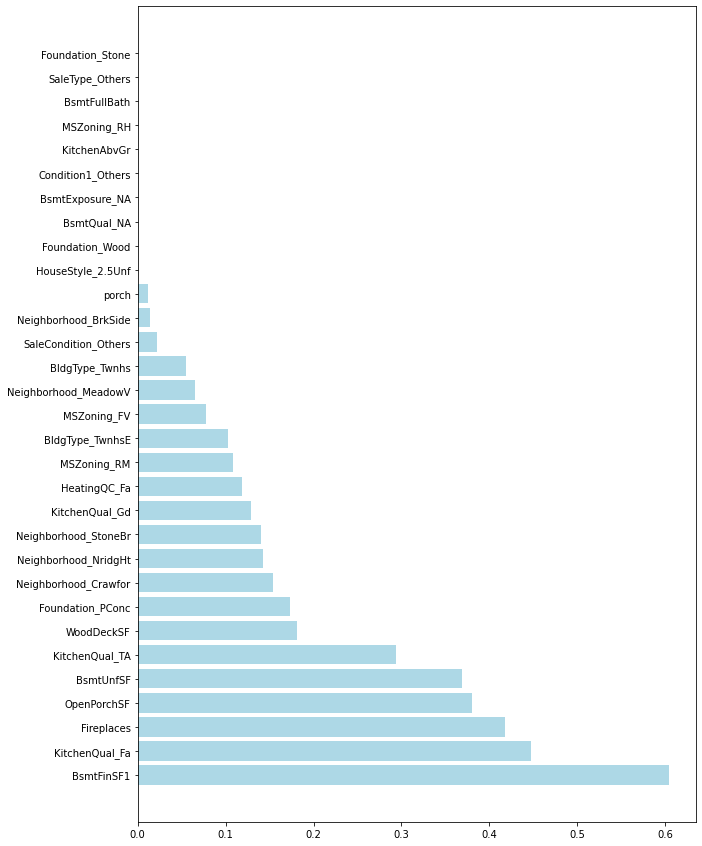

In [197]:
fig = plt.figure(figsize=(10,15))
plt.barh(lasso_sort['Feature Name'],lasso_sort['coef'], color ='#ADD8E6')

The r square score for 
- r2_train_lr :	0.926525
- r2_test_lr :	0.903001
- rss1_lr :	11.643462
- rss2_lr :	6.685127
- mse_train_lr :	0.107369
- mse_test_lr :	0.124111

Top coeff for Lasso are
- GrLivArea
- OverallQual
- Age_of_house
- OverallCond
- SaleType_WD

In [198]:
ridge_sort = coeff_values[['Feature Name','Ridge']]

ridge_sort['sign'] = ridge_sort['Ridge'].apply(lambda x : 'positive' if x >= 0 else 'negative')
ridge_sort['coef'] = ridge_sort['Ridge'].apply(lambda x: abs(x) )
ridge_sort = ridge_sort.sort_values(by=['coef'], ascending=False)
ridge_sort

,Feature Name,Ridge,sign,coef
0,BsmtFinSF1,0.567941,positive,0.567941
26,KitchenQual_Fa,-0.461221,negative,0.461221
4,Fireplaces,0.413602,positive,0.413602
6,OpenPorchSF,0.383283,positive,0.383283
1,BsmtUnfSF,0.351300,positive,0.351300
28,KitchenQual_TA,-0.306638,negative,0.306638
5,WoodDeckSF,0.207690,positive,0.207690
15,Neighborhood_StoneBr,0.192271,positive,0.192271
22,Foundation_Wood,0.185184,positive,0.185184
20,Foundation_PConc,0.176947,positive,0.176947


<BarContainer object of 31 artists>

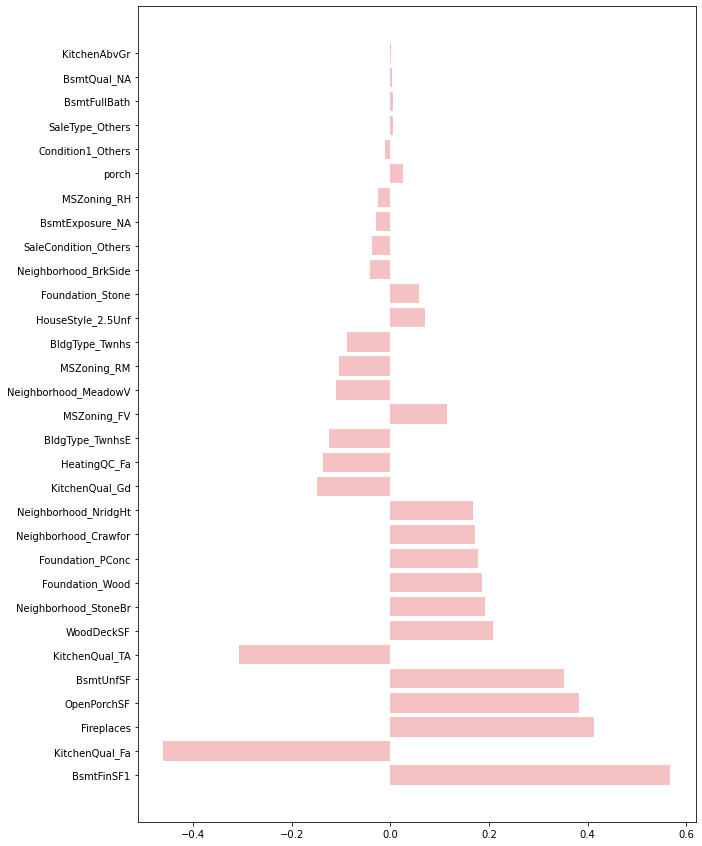

In [199]:
fig = plt.figure(figsize=(10,15))
plt.barh(ridge_sort['Feature Name'],ridge_sort['Ridge'], color ='#f4c2c2')

<BarContainer object of 31 artists>

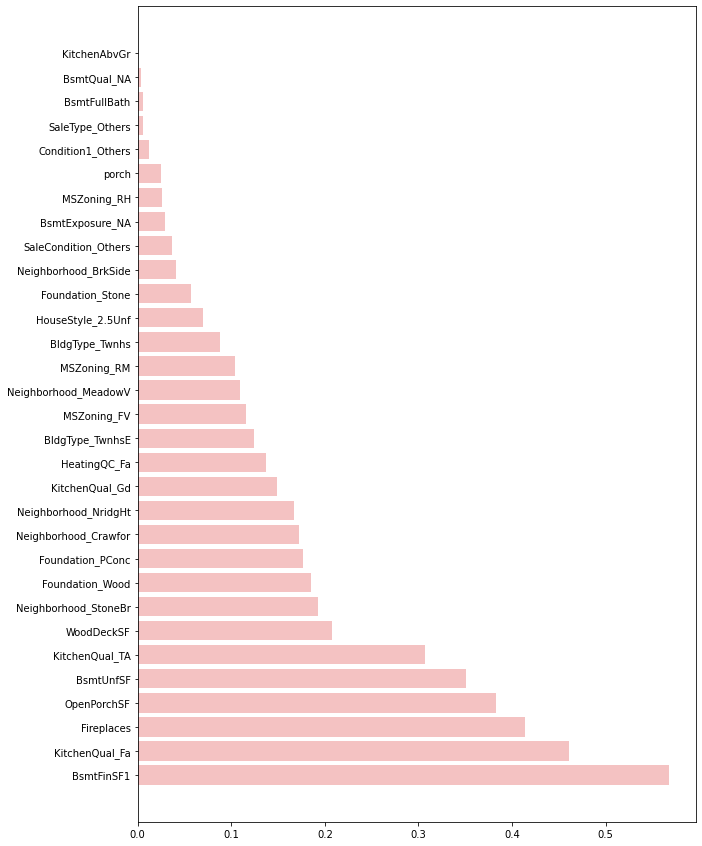

In [200]:
fig = plt.figure(figsize=(10,15))
plt.barh(ridge_sort['Feature Name'],ridge_sort['coef'], color ='#f4c2c2')

Metrics	ridge
- r2_train_lr :	0.926850
- r2_test_lr :	0.901627
- rss1_lr :	11.591964
- rss2_lr :	6.779794
- mse_train_lr :	0.107132
- mse_test_lr :	0.124987

Top coeff for Ridge are
- GrLivArea
- OverallQual
- Age_of_house
- OverallCond
- SaleType_WD

In [1]:
## Now that we have our model ready, lets test our predictions on the unseen test file

In [202]:
df_test_sub = pd.read_csv('test.csv')
df_test_sub.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [203]:
submission_df = pd.DataFrame(df_test_sub['Id'], columns = ['Id'])
submission_df.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [204]:
df_test_sub['BsmtFinSF2'] = df_test_sub['BsmtFinSF2'].apply(lambda x : 1 if x > 0 else 0 )

df_test_sub['EnclosedPorch'] = df_test_sub['EnclosedPorch'].apply(lambda x : 1 if x > 0 else 0 )
df_test_sub['ScreenPorch'] = df_test_sub['ScreenPorch'].apply(lambda x : 1 if x > 0 else 0 )
df_test_sub['3SsnPorch'] = df_test_sub['3SsnPorch'].apply(lambda x : 1 if x > 0 else 0 )

df_test_sub['porch'] = df_test_sub['3SsnPorch'] +df_test_sub['ScreenPorch'] + df_test_sub['EnclosedPorch']

df_test_sub['Fireplaces'][df_test_sub['FireplaceQu'].isnull()].value_counts()
df_test_sub['FireplaceQu'].fillna('NA', inplace=True)

rev_null = ['BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtQual']
df_test_sub[rev_null]=df_test_sub[rev_null].replace({np.nan:'NA',
                                   np.nan:'NA',
                                   np.nan:'NA',
                                   np.nan:'NA'
                                  })

rev_null = ['GarageFinish','GarageType']
df_test_sub[rev_null]=df_test_sub[rev_null].replace({np.nan:'NA',
                                   np.nan:'NA'
                                  })

df_test_sub['GarageYrBlt'] = df_test_sub['GarageYrBlt'].apply(lambda x : 1 if x> 0 else 0)

df_test_sub['Age_of_house'] =df_test_sub['YrSold'] - df_test_sub['YearBuilt']

rev_null = ['MasVnrArea','MasVnrType']
df_test_sub['MasVnrArea'].fillna(0, inplace=True)
df_test_sub['MasVnrType'].fillna('None', inplace=True)

df_test_sub['LotFrontage'].fillna(df_test_sub['LotFrontage'].mean(), inplace=True)

df_test_sub['Condition1'] = df_test_sub['Condition1'].map({ 'Norm'      : 'Norm',
                                            'Feedr'   : 'Feedr',
                                            'Artery'  : 'Others',
                                            'RRAn'    : 'Others',
                                            'PosN'    : 'Others',
                                            'RRAe'    : 'Others',
                                            'PosA'    : 'Others',
                                            'RRNn'    : 'Others',
                                            'RRNe'    : 'Others'
                
})

df_test_sub['GarageType'] = df_test_sub['GarageType'].map({   'Attchd'      :  'Attchd',
                                            'Detchd'      :  'Detchd',
                                            'BuiltIn'     :  'Others' ,  
                                            'NA'          :  'NA',
                                            'Basment'     :  'Others',
                                            'CarPort'     :  'Others',
                                            '2Types'      :  'Others'
})

df_test_sub['BsmtFinType2'] = df_test_sub['BsmtFinType2'].map({
    
'Unf'  :    'Unf',
'Rec'  :    'Others',
'LwQ'  :    'Others',
'NA'   :    'Others',
'BLQ'  :    'Others',
'ALQ'  :    'Others',
'GLQ'  :    'Others',
    
})

df_test_sub['BsmtFinType1'] = df_test_sub['BsmtFinType1'].map({
    
'Unf'  :    'Unf',
'Rec'  :    'Others',
'LwQ'  :    'Others',
'NA'   :    'Others',
'BLQ'  :    'Others',
'ALQ'  :    'ALQ',
'GLQ'  :    'GLQ',
    
})

df_test_sub['RoofStyle'] = df_test_sub['RoofStyle'].map({  'Gable'     :  'Gable',
                                         'Hip'       :  'Hip',
                                         'Flat'      :  'Others',
                                         'Gambrel'   :  'Others',
                                         'Mansard'   :  'Others',
                                         'Shed'      :  'Others'

})

df_test_sub['SaleType'] = df_test_sub['SaleType'].map({    'WD'  :   'WD',
                                        'New'  :   "New",
                                        'COD'  :   'Others',
                                        'ConLD':   'Others',
                                        'ConLw':   'Others',
                                        'ConLI':   'Others',
                                        'CWD'  :   'Others',
                                        'Oth'  :   'Others',
                                        'Con'  :   'Others'
    
})

df_test_sub['SaleCondition'] = df_test_sub['SaleCondition'].map({ 'Normal' :'Normal',
                                                'Partial':'Others' ,
                                                'Abnorml':'Others',
                                                'Family' :'Others',
                                                'Alloca' :'Others',
                                                'AdjLand':'Others'      
})

df_test_sub['Exterior1st'] = df_test_sub['Exterior1st'].map({
    
'VinylSd'  :  'VinylSd',
'HdBoard'  :  'HdBoard',
'MetalSd'  :  'MetalSd',
'Wd Sdng'  :  'Wd Sdng',
'Plywood'  :  'Other',
'CemntBd'  :  'Other',
'BrkFace'  :  'Other',
'WdShing'  :  'Other',
'Stucco'   :  'Other',
'AsbShng'  :  'Other',
'Stone'    :  'Other',
'BrkComm'  :  'Other',
'ImStucc'  :  'Other',
'AsphShn'  :  'Other'
})

df_test_sub['Exterior2nd'] = df_test_sub['Exterior2nd'].map({
    
'VinylSd'   :    'VinylSd',
'MetalSd'   :    'MetalSd',
'HdBoard'   :    'HdBoard',
'Wd Sdng'   :    'Wd Sdng',
'Plywood'   :    'Plywood',
'CmentBd'   :    'Other',
'Wd Shng'   :    'Other',
'Stucco'    :    'Other',
'BrkFace'   :    'Other',
'AsbShng'   :    'Other',
'ImStucc'   :    'Other',
'Brk Cmn'   :    'Other',
'Stone'     :    'Other',
'AsphShn'   :    'Other',
'Other'     :    'Other',
'CBlock'    :    'Other'
})

df_test_sub['LandContour'] = df_test_sub['LandContour'].map({ 'Lvl' : 'Lvl',
                                            'Bnk' : 'Others',
                                            'HLS' : 'Others',
                                            'Low' : 'Others'
    
})

In [205]:
col_to_drop = ['Utilities','Street','Condition2','RoofMatl','Heating','LandSlope','CentralAir','Functional','Electrical','PavedDrive','GarageCond','BsmtCond','GarageQual','LowQualFinSF','BsmtFinSF2','3SsnPorch','ScreenPorch','Id','PoolQC','PoolArea','MiscFeature','Alley','Fence','MiscVal','GarageArea','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','YearBuilt']
df_test_sub.drop(col_to_drop, inplace=True, axis = 1)

In [206]:
missing = df_test_sub.isnull().sum()
missing[missing >0 ]

MSZoning        4
Exterior1st     2
Exterior2nd     1
BsmtFinSF1      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
GarageCars      1
SaleType        1
dtype: int64

In [207]:
df_test_sub.fillna(0, inplace=True)
missing = df_test_sub.isnull().sum()
missing[missing >0 ]

Series([], dtype: int64)

In [208]:
df_test_sub['HouseStyle'].value_counts()

1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64

In [209]:
# dummy values 
house_categorical = df_test_sub.select_dtypes(include=['object'])
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

# drop categorical variables 
df_test_sub = df_test_sub.drop(list(house_categorical.columns), axis=1)

# concat dummy variables with X
df_test_sub = pd.concat([df_test_sub, house_dummies], axis=1)

df_test_sub.shape

(1459, 139)

In [210]:
df_test_sub['HouseStyle_2.5Fin'] = 0

In [211]:
df_test_sub = df_test_sub[X_train.columns]


In [212]:
df_test_scaled = scaler.transform(df_test_sub)
df_test_scaled = pd.DataFrame(df_test_scaled,columns = df_test_sub.columns)

In [221]:
df_test_rfe = df_test_scaled[X_test_rfe.columns]

In [222]:
y_pred_test = lasso.predict(df_test_rfe)

In [223]:
y_test_predicted_df1 = np.exp(lasso.predict(df_test_rfe))

In [224]:
y_test_predicted_df1

array([124868.36234559, 185346.19047595, 188917.41482523, ...,
       178219.04286843, 151107.23959133, 191297.06282489])

In [228]:
predictions =np.exp(y_pred_test)

In [229]:
print(predictions)

[124868.36234559 185346.19047595 188917.41482523 ... 178219.04286843
 151107.23959133 191297.06282489]


In [230]:
submission_df['SalePrice'] = predictions

In [231]:
submission_df.to_csv('submission.csv',index=False, header=True)

In [232]:
submission_df.shape

(1459, 2)